In [635]:
from scipy.optimize import linprog
import numpy as np

# import random
import matplotlib.pyplot as plt


In [636]:
def plot_price_curve(price_curve: list) -> None:
    """Plot the price curve for a day

    Args:
        price_curve: list of float, the price curve in NOK per kWh

    Returns:
        None
    """
    import matplotlib.pyplot as plt
    plt.step(range(24), price_curve, where="post")
    plt.xlabel("Hour")
    plt.xticks(range(25), [f"{i}:00" for i in range(25)], rotation=45)
    plt.ylabel("NOK per kWh")
    plt.title("Generated price curve for a day")
    plt.ylim(0)
    plt.show()


def plot_price_curve_vs_usage(price_curve: list, usage: list, num_households: int = 1, number_of_EVs: int = 1 ) -> None:
    """Plot the price curve and the usage curve in the same graph

    Args:
        price_curve: list of float, the price curve in NOK per kWh
        usage: list of float, the usage in kWh for each hour.
        num_households: int, number of household. Default is 1
        number_of_EVs: int, number of electric vehicles. Default is 1

    Returns:
        None
    """
    price_curve = list(price_curve)
    usage = list(usage)

    # appending 0 to the end of the lists to make them the same length
    price_curve.append(0)
    usage.append(0)

    # plotting the optimal power usage against the price curve
    plt.step(range(25), price_curve, label="Price curve (NOK/kWh)", where="post")
    plt.step(range(25), usage, label="Optimal power usage (kWh)", where="post")
    plt.suptitle("Optimal power usage vs. price curve")
    plt.title(f'Number of households = {num_households}, Number of EVs = {number_of_EVs}', fontsize=8)
    plt.xlabel("Hour")
    plt.xticks(range(25), [f"{i}:00" for i in range(25)], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

def print_price_curve(price_curve: list) -> None:
    """Print the price curve in a human readable format

    Args:
        price_curve: list of float, the price curve in NOK per kWh

    Returns:
        None
    """
    print("Price curve for a day:")
    print("-" * 30)
    print(f"{'Hour':<4} {'Time of day':<13} {'NOK per kWh':>10}")
    print("-" * 30)
    for hour, price in enumerate(price_curve):
        print(f"{hour + 1:<4} ({hour:02d}.00-{hour + 1:02d}.00) {price:>10.2f}")
    print("-" * 30)


def print_optimal_usage(costs: list, usage: list):
    """Print the optimal usage in a human readable format

    Args:
        costs: list of float, the price curve in NOK per kWh
        usage: list of float, the usage in kWh for each hour. Example: [(10, 5.5)] for 5.5 kWh at 10:00am

    Returns:
        None
    """
    # Calculating the total cost of the usage

    total_cost = sum([costs[i] * usage for i, usage in enumerate(usage)])

    print("Optimal power usage for each hour:")
    print("-" * 60)
    print(f"{'Hour':<4} | {'Time of day':<13} | {'NOK per kWh':>15} | {'Usage (kWh)':>15}")
    print("-" * 60)
    for hour, usage in enumerate(usage):
        print(
            f"{hour + 1:<4} | ({hour:02d}.00-{hour + 1:02d}.00) | {costs[hour]:>15.2f} | {usage:>15.2f}"
        )
    print("-" * 60)
    print(f"{'Total cost:':<37} {total_cost:>15.2f} NOK")


# Question 1


Optimal solution vector: [1.94 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   9.9  0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   1.44 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]
Optimal cost: 6.64


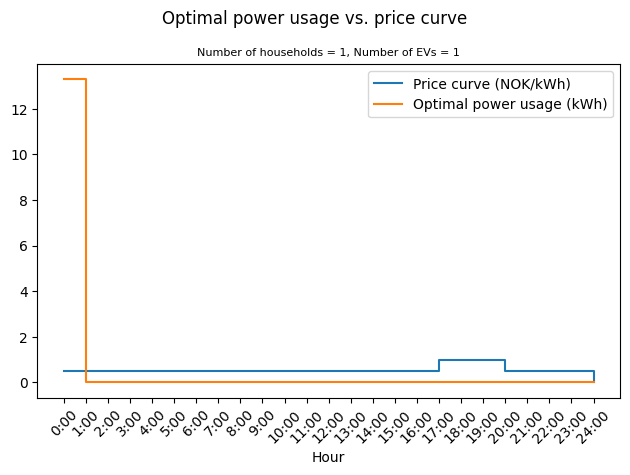

Optimal power usage for each hour:
------------------------------------------------------------
Hour | Time of day   |     NOK per kWh |     Usage (kWh)
------------------------------------------------------------
1    | (00.00-01.00) |            0.50 |           13.28
2    | (01.00-02.00) |            0.50 |            0.00
3    | (02.00-03.00) |            0.50 |            0.00
4    | (03.00-04.00) |            0.50 |            0.00
5    | (04.00-05.00) |            0.50 |            0.00
6    | (05.00-06.00) |            0.50 |            0.00
7    | (06.00-07.00) |            0.50 |            0.00
8    | (07.00-08.00) |            0.50 |            0.00
9    | (08.00-09.00) |            0.50 |            0.00
10   | (09.00-10.00) |            0.50 |            0.00
11   | (10.00-11.00) |            0.50 |            0.00
12   | (11.00-12.00) |            0.50 |            0.00
13   | (12.00-13.00) |            0.50 |            0.00
14   | (13.00-14.00) |            0.50 |     

In [666]:
# Constants
peak_cost = 1  # dollars per kWh during peak hours
non_peak_cost = 0.5  # dollars per kWh during non-peak hours
peak_hours = range(17, 20)  # Peak hours from 5:00pm to 8:00pm

# Power requirements for each applicant (in kWh)
power_requirements = [1.94, 9.9, 1.44]  # Laundry machine  # EV charger  # Dishwasher

# Objective function coefficients (cost per kWh)
costs = [non_peak_cost if hour not in peak_hours else peak_cost for hour in range(24)]

# Coefficients for the equality constraint (power requirements)
c = np.tile(costs, len(power_requirements))

# Coefficients for the equality constraint (power requirements)
A_eq = np.kron(np.eye(len(power_requirements)), np.ones((1, 24)))

# Right-hand side for the equality constraint (power requirements)
b_eq = np.array(power_requirements)

# print(f'costs: {costs}')
# print(f'c: {c}')
# print(f'A_eq: {A_eq}')
# print(f'b_eq: {b_eq}')

# Solve the linear programming problem
result = linprog(c, A_eq=A_eq, b_eq=b_eq)

print(f'Optimal solution vector: {result.x}')
print(f'Optimal cost: {result.fun}')

# Extract the optimal power usage and reshape it to get the usage for each appliance at each hour
optimal_usage = result.x.reshape(-1, 24)

# sum the power usage for each hour
optimal_usage = np.sum(optimal_usage, axis=0)
# plot_price_curve(costs)
plot_price_curve_vs_usage(costs, optimal_usage)
print_optimal_usage(costs, optimal_usage)


# Question 2


## Generating price curve (RTP)


In [638]:
def generate_price_curve_RTP(peak_hours: list) -> list:
    """Generate a random real-time price curve for a day

    Returns:
        list of float: the price curve in NOK per kWh
    """
    import random

    # Setting the seed to make the results reproducible
    random.seed(6)

    # Generating a random price curve that is higher during peak hours
    price_curve = [
        random.uniform(1, 1.5) if i in peak_hours else random.uniform(0.6, 0.7)
        for i in range(24)
    ]

    return price_curve


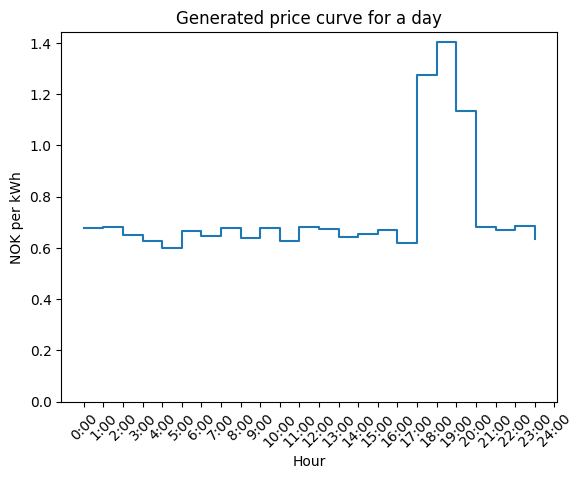

Price curve for a day:
------------------------------
Hour Time of day   NOK per kWh
------------------------------
1    (00.00-01.00)       0.68
2    (01.00-02.00)       0.68
3    (02.00-03.00)       0.65
4    (03.00-04.00)       0.63
5    (04.00-05.00)       0.60
6    (05.00-06.00)       0.67
7    (06.00-07.00)       0.65
8    (07.00-08.00)       0.68
9    (08.00-09.00)       0.64
10   (09.00-10.00)       0.68
11   (10.00-11.00)       0.63
12   (11.00-12.00)       0.68
13   (12.00-13.00)       0.67
14   (13.00-14.00)       0.64
15   (14.00-15.00)       0.65
16   (15.00-16.00)       0.67
17   (16.00-17.00)       0.62
18   (17.00-18.00)       1.28
19   (18.00-19.00)       1.40
20   (19.00-20.00)       1.13
21   (20.00-21.00)       0.68
22   (21.00-22.00)       0.67
23   (22.00-23.00)       0.68
24   (23.00-24.00)       0.63
------------------------------


In [639]:
costs = generate_price_curve_RTP(peak_hours)
plot_price_curve(costs)
print_price_curve(costs)


## Appliances


In [640]:
# Constants
peak_hours = range(17, 20)  # Peak hours from 5:00pm to 8:00pm

# appliances = {
#     # non-shiftable loads
#     "Lighting": {"power": 2, "hours": range(10, 20)},
#     "Heating": {"power": 9.6, "hours": range(0, 23)},
#     "Refrigerator": {"power": 1.32, "hours": range(0, 23)},
#     "Stove": {"power": 3.9, "hours": [8, 9, 11, 12, 17, 18]},
#     "TV": {"power": 0.6, "hours": range(17, 22)},
#     "Computer": {"power": 0.6, "hours": range(17, 22)},
#     "Router": {"power": 0.144, "hours": range(0, 23)},
#     "Separate freezer": {"power": 0.84, "hours": range(0, 23)},
#     "Microwave": {"power": 1.2, "hours": range(17, 18)},
#     # shiftable loads
#     "Dishwasher": {"power": 1.44, "hours": range(24)},
#     "Laundry machine": {"power": 1.94, "hours": range(24)},
#     "Dryer": {"power": 2.5, "hours": range(24)},
#     "EV": {"power": 9.9, "hours": range(24)},
# }

# Power requirements and time constraints for each appliance
appliances = [
    # non-shiftable loads
    {"power": 2, "hours": range(10, 20)},  # Lighting
    {"power": 9.6, "hours": range(0, 23)},  # Heating
    {"power": 1.32, "hours": range(0, 23)},  # Refrigerator
    {
        "power": 3.9,
        "hours": [8, 9, 11, 12, 17, 18],
    },  # Stove
    {"power": 0.6, "hours": range(17, 22)},  # TV
    {"power": 0.6, "hours": range(17, 22)},  # Computer
    {"power": 0.144, "hours": range(0, 23)},  # Router
    {"power": 0.84, "hours": range(0, 23)},  # Separate freezer
    {"power": 1.2, "hours": range(17, 18)},  # Microwave
    # shiftable loads
    {"power": 1.44, "hours": range(24)},  # Dishwasher
    {"power": 1.94, "hours": range(24)},  # Laundry machine
    {"power": 2.5, "hours": range(24)},  # Dryer
    {"power": 9.9, "hours": range(24)},  # EV
]


non_shiftable_appliances = appliances[:9]
shiftable_appliances = appliances[9:]


In [641]:
# sum the power requirement of the shiftable appliances
shiftable_power_requirement = sum(
    [appliance["power"] for appliance in shiftable_appliances[:-1]]
)

print([appliance["power"] for appliance in shiftable_appliances[:-1]])
print(shiftable_power_requirement*30)


[1.44, 1.94, 2.5]
176.4


## Plotting code q2


In [642]:
# # Generate a random real-time price curve for a day
# costs = generate_price_curve_RTP(peak_hours)

# # Get the lowest priced hour of the day
# lowest_price = min(costs)
# lowest_price_hour = costs.index(lowest_price)

# print(
#     f"The lowest price of the day is {lowest_price} NOK/kWh at {lowest_price_hour}:00"
# )

# # Initialize the optimal power usage for each hour
# optimal_usage = [0] * 24

# # Get the power requirements for the shiftable appliances
# shiftable_power_requirements = [
#     appliance["power"] for appliance in shiftable_appliances
# ]


# # Distribute the power requirements for the shiftable appliances to the lowest price hour
# optimal_usage[lowest_price_hour] = sum(shiftable_power_requirements)


# # Distribute the power requirements to the non-shiftable applicants
# for appliance in non_shiftable_appliances:
#     for hour in appliance["hours"]:
#         optimal_usage[hour] += appliance["power"] / len(appliance["hours"])

# plot_price_curve_vs_usage(costs, optimal_usage)
# print_optimal_usage(costs, optimal_usage)


## Optimization q2


### SciPy.linprog package


[{'power': 1.44, 'hours': range(0, 24)}, {'power': 1.94, 'hours': range(0, 24)}, {'power': 2.5, 'hours': range(0, 24)}, {'power': 9.9, 'hours': range(0, 24)}]
[{'power': 2, 'hours': range(10, 20)}, {'power': 9.6, 'hours': range(0, 23)}, {'power': 1.32, 'hours': range(0, 23)}, {'power': 3.9, 'hours': [8, 9, 11, 12, 17, 18]}, {'power': 0.6, 'hours': range(17, 22)}, {'power': 0.6, 'hours': range(17, 22)}, {'power': 0.144, 'hours': range(0, 23)}, {'power': 0.84, 'hours': range(0, 23)}, {'power': 1.2, 'hours': range(17, 18)}]


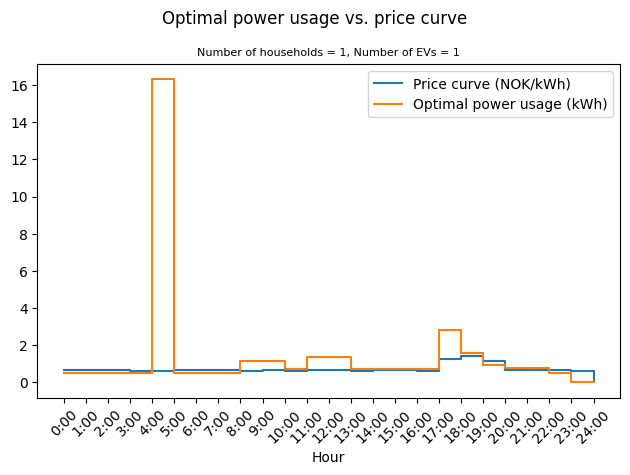

Optimal power usage for each hour:
------------------------------------------------------------
Hour | Time of day   |     NOK per kWh |     Usage (kWh)
------------------------------------------------------------
1    | (00.00-01.00) |            0.68 |            0.52
2    | (01.00-02.00) |            0.68 |            0.52
3    | (02.00-03.00) |            0.65 |            0.52
4    | (03.00-04.00) |            0.63 |            0.52
5    | (04.00-05.00) |            0.60 |           16.30
6    | (05.00-06.00) |            0.67 |            0.52
7    | (06.00-07.00) |            0.65 |            0.52
8    | (07.00-08.00) |            0.68 |            0.52
9    | (08.00-09.00) |            0.64 |            1.17
10   | (09.00-10.00) |            0.68 |            1.17
11   | (10.00-11.00) |            0.63 |            0.72
12   | (11.00-12.00) |            0.68 |            1.37
13   | (12.00-13.00) |            0.67 |            1.37
14   | (13.00-14.00) |            0.64 |     

In [654]:
RTP_costs = np.array(generate_price_curve_RTP(peak_hours))
p = np.array([appliance["power"] for appliance in shiftable_appliances])
costs = np.tile(RTP_costs, len(p))
# e = np.ones((24, 4))
A_eq = np.kron(np.eye(len(p)), np.ones((1, 24)))

# print(f"Shape of RTP_costs = {RTP_costs.shape}, e.T = {e.T.shape} and p = {p.shape}")
# print(np.eye(len(p)))
# print("c= ", RTP_costs)
# print("A_eq= ", A_eq)
# print("p= ", p)

# Solve the linear programming problem
result = linprog(costs, A_eq=A_eq, b_eq=p)

# print(result.x)

# Extract the optimal power usage and reshape it to get the usage for each appliance at each hour
optimal_usage = result.x.reshape(-1, 24)

# print(optimal_usage)

# sum the power usage for each hour
optimal_usage = np.sum(optimal_usage, axis=0)

# add non-shiftable appliances to the optimal_usage
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        optimal_usage[hour] += appliance["power"] / len(appliance["hours"])

print(shiftable_appliances)
print(non_shiftable_appliances)

plot_price_curve_vs_usage(RTP_costs, optimal_usage)
print_optimal_usage(costs, optimal_usage)


In [655]:
print(A_eq)
print(p)


[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

### Pulp

In [644]:
# import pulp
# import matplotlib.pyplot as plt
# import numpy as np
# import random

# # from energy import *


# def time_of_use(peak_hours: range, peak_cost: float, non_peak_cost: float):
#     """
#     @param peak_hours - list of peak hours
#     @param peak_cost - the cost of energy during peak hours
#     @param non_peak_cost - the cost of energy during non-peak hours
#     returns a list of energy prices varying from peak and non-peak hours
#     """
#     return [peak_cost if hour in peak_hours else non_peak_cost for hour in range(24)]


# def real_time_pricing(
#     peak_hours: range, peak_cost: float, non_peak_cost: float, fluctuation: float
# ):
#     return [
#         (
#             peak_cost + random.uniform(-fluctuation, fluctuation)
#             if hour in peak_hours
#             else non_peak_cost + random.uniform(-fluctuation, fluctuation)
#         )
#         for hour in range(24)
#     ]



# # # energy_cost = {hour: 1 if 17 <= hour <= 20 else 0.5 for hour in range(24)}
# # energy_cost = [
# #     1 + random.uniform(-0.125, 0.125)
# #     if 17 <= hour <= 20 else 0.5 + random.uniform(-0.2, 0.2)
# #     for hour in range(24)
# # ]


# energy_cost = generate_price_curve_RTP(peak_hours)

# # # Example data structures
# # shiftable_appliances = {
# #     "Dishwasher": {"energy": 1.44, "earliest_start": 0, "latest_end": 23},
# #     "Laundry machine": {"energy": 1.94, "earliest_start": 0, "latest_end": 23},
# #     "Dryer": {"energy": 2.5, "earliest_start": 0, "latest_end": 23},
# #     "EV": {"energy": 9.9, "earliest_start": 0, "latest_end": 23},
# # }

# # non_shiftable_appliances = {
# #     "Lighting": {"energy": 2, "start_hour": 10, "end_hour": 19},
# #     "Heating": {"energy": 9.6, "start_hour": 0, "end_hour": 22},
# #     "Refrigerator": {"energy": 1.32, "start_hour": 0, "end_hour": 22},
# #     "Stove": {"energy": 3.9, "start_hour": 8, "end_hour": 18},
# #     "TV": {"energy": 0.6, "start_hour": 17, "end_hour": 21},
# #     "Computer": {"energy": 0.6, "start_hour": 17, "end_hour": 21},
# #     "Router": {"energy": 0.144, "start_hour": 0, "end_hour": 22},
# #     "Separate freezer": {"energy": 0.84, "start_hour": 0, "end_hour": 22},
# #     "Microwave": {"energy": 1.2, "start_hour": 17, "end_hour": 17},
# # }


# # Example data structures
# shiftable_appliances = {
#     "dishwasher": {"energy": 1.5, "earliest_start": 0, "latest_end": 23},
#     "dryer": {"energy": 1.3, "earliest_start": 0, "latest_end": 23},
#     "laundry_machine": {"energy": 2, "earliest_start": 0, "latest_end": 22},
#     "EV": {"energy": 3, "earliest_start": 0, "latest_end": 23},
#     "C": {"energy": 3, "earliest_start": 0, "latest_end": 23},
#     "D": {"energy": 2, "earliest_start": 0, "latest_end": 23},
#     "E": {"energy": 1.13, "earliest_start": 0, "latest_end": 23},
# }


# non_shiftable_appliances = {
#     "refrigerator": {"energy": 1.32, "start_hour": 0, "end_hour": 23}
# }


# threshold = 5

# for appliance in non_shiftable_appliances:
#     threshold -= non_shiftable_appliances[appliance]["energy"] / 24

# # print(threshold)

# max_energy_threshold = {hour: threshold for hour in range(24)}


# # Create the model
# model = pulp.LpProblem("Appliance_Scheduling", pulp.LpMinimize)

# # Variables
# x = pulp.LpVariable.dicts(
#     "Schedule",
#     ((appliance, hour) for appliance in shiftable_appliances for hour in range(24)),
#     cat="Binary",
# )  # 1 if appliance runs at hour, 0 otherwise


# # Operational time window constraints for shiftable appliances
# for appliance, details in shiftable_appliances.items():
#     model += (
#         pulp.lpSum(
#             x[(appliance, hour)]
#             for hour in range(details["earliest_start"], details["latest_end"] + 1)
#         )
#         * details["energy"]
#         == details["energy"]
#     )

# # Ensuring non-shiftable appliances are accounted for
# for appliance, details in non_shiftable_appliances.items():
#     model += details["energy"]  # Assuming constant operation across the specified hours


# model += pulp.lpSum(
#     x[(appliance, hour)] * shiftable_appliances[appliance]["energy"] * energy_cost[hour]
#     for appliance in shiftable_appliances
#     for hour in range(24)
# )

# # Add constraints for maximum energy threshold per hour
# for hour in range(24):
#     model += (
#         pulp.lpSum(
#             x[(appliance, hour)] * shiftable_appliances[appliance]["energy"]
#             for appliance in shiftable_appliances
#         )
#         <= max_energy_threshold[hour]
#     )

# model.solve()


# schedule_energy_data = {
#     appliance: [0 for hour in range(24)] for appliance in shiftable_appliances
# }

# for appliance in shiftable_appliances:
#     for hour in range(24):
#         if pulp.value(x[(appliance, hour)]) == 1:
#             # Apply the energy cost for the current hour to the energy usage
#             schedule_energy_data[appliance][hour] = (
#                 shiftable_appliances[appliance]["energy"] * energy_cost[hour]
#             )


In [645]:
# print(energy_cost)
# plot_price_curve(energy_cost)
# # optimal_usage = [0 for hour in range(24)]
# for i, (appliance, costs) in enumerate(schedule_energy_data.items()):
#     # print(i)
#     print(appliance, costs)
#     # optimal_usage = np.add(optimal_usage, costs)

# # plot_price_curve_vs_usage(energy_cost, optimal_usage)
# # print_optimal_usage(energy_cost, optimal_usage)


In [646]:
# fig, ax1 = plt.subplots(figsize=(12, 6))

# # Assuming 'schedule_energy_data' is already populated with costs considered
# # 'energy_cost' dictionary defines the cost per hour

# # Bar plot for the cost of energy used by each appliance
# bar_width = 0.35
# index = np.arange(24)

# for i, (appliance, costs) in enumerate(schedule_energy_data.items()):
#     ax1.bar((index + i * bar_width * 0.25), costs, bar_width, label=appliance)

# ax1.set_xlabel("Hour of the Day")
# ax1.set_ylabel("Cost of Energy Used ($)", color="blue")
# ax1.set_title("Cost of Energy Used by Shiftable Appliances and Energy Cost per Hour")
# ax1.set_xticks(index + bar_width / 2)
# ax1.set_xticklabels(range(24))
# ax1.tick_params(axis="y", labelcolor="blue")

# # Line plot for the cost of energy per kWh
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# energy_cost_values = energy_cost
# ax2.plot(
#     index, energy_cost_values, color="red", label="Energy Cost per kWh", marker="o"
# )
# ax2.set_ylabel("Energy Cost per kWh ($)", color="red")
# ax2.tick_params(axis="y", labelcolor="red")

# # Adding a legend for the line plot
# lines, labels = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc="upper right")

# plt.tight_layout()
# plt.show()


# Question 3


## Plotting code


In [647]:
# costs = generate_price_curve_RTP(peak_hours)
# optimal_usage = np.zeros_like(costs)

# # power_requirements for the shiftable applicants excluding EV
# EV_power_requirement = shiftable_appliances[-1]["power"]
# shiftable_power_requirements = [
#     appliance["power"] for appliance in shiftable_appliances[:-1]
# ]

# # Distribute the power requirements to the lowest price hour
# optimal_usage[lowest_price_hour] = (
#     sum(shiftable_power_requirements) * 30 + EV_power_requirement * 5
# )

# # Distribute the power requirements to the non-shiftable applicants
# for appliance in non_shiftable_appliances:
#     for hour in appliance["hours"]:
#         optimal_usage[hour] += appliance["power"] / len(appliance["hours"]) * 30

# plot_price_curve_vs_usage(costs, optimal_usage)
# print_optimal_usage(costs, optimal_usage)


## Optimization Scipy


Optimal Solution for Q3 when each household has dishwasher, laundry machine and dryer: [0.   0.   0.   0.   1.44 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 1.94 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   2.5  0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.  ]
Optimal Value of Objective Function(lowest cost for using the above three appliances in a day in NOK): 3.528265608352422

Optimal Solution for Q3 when only 5 households have EV : [0.  0.  0.  0.  9.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.9 0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  9.9 0.
 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  9.9 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  

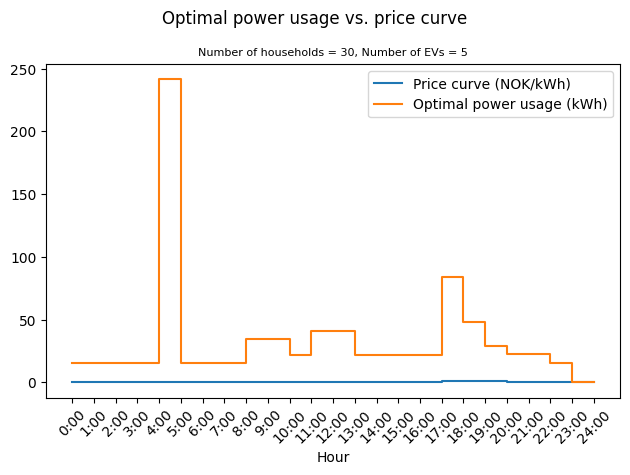

Optimal power usage for each hour:
------------------------------------------------------------
Hour | Time of day   |     NOK per kWh |     Usage (kWh)
------------------------------------------------------------
1    | (00.00-01.00) |            0.68 |           15.53
2    | (01.00-02.00) |            0.68 |           15.53
3    | (02.00-03.00) |            0.65 |           15.53
4    | (03.00-04.00) |            0.63 |           15.53
5    | (04.00-05.00) |            0.60 |          241.43
6    | (05.00-06.00) |            0.67 |           15.53
7    | (06.00-07.00) |            0.65 |           15.53
8    | (07.00-08.00) |            0.68 |           15.53
9    | (08.00-09.00) |            0.64 |           35.03
10   | (09.00-10.00) |            0.68 |           35.03
11   | (10.00-11.00) |            0.63 |           21.53
12   | (11.00-12.00) |            0.68 |           41.03
13   | (12.00-13.00) |            0.67 |           41.03
14   | (13.00-14.00) |            0.64 |     

In [648]:
# -------------------------------- Solution for Q3 when all 30 households have dishwasher, laundry machine and dryer -----------------------------------------

# Objective function coefficients, because we have 3 shiftable appliances, [A_i,B_i,C_i]
# the coefficient vector is a 72*1 vector for all variables in x,
# x is a 72*1 decision vector for all A_i, B_i,C_i
costs = generate_price_curve_RTP(peak_hours)
c = np.tile(costs, 3)

# -------------------------------- equality constraints -----------------------------------------
# Initialize an empty list to store the A_eq
A_eq = []
# Create the A_eq using list comprehension
for i in range(3):
    row = [1 if i * 24 <= j < i * 24 + 24 else 0 for j in range(72)]
    A_eq.append(row)

# Right-hand side of the equality constraints
b_eq = [1.44, 1.94, 2.5]  # Right-hand side of equality constraints

# Bounds for each decision variable
bounds = [
    (0, None) for _ in range(72)
]  # Non-negative bounds for A_0..A_23, B_0...B_23, C_0..C_23, D_0...D_23 all 96 variables


# # Solve the linear programming problem for 3 shiftable appliances for all 30 households
result_3_all = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method="highs")
decision_variable_dimension = len(result_3_all.x)

# Check if the optimization was successful
if result_3_all.success:
    optimal_solution_3_all = result_3_all.x
    optimal_value_3_all = result_3_all.fun
    print(
        "Optimal Solution for Q3 when each household has dishwasher, laundry machine and dryer:",
        optimal_solution_3_all,
    )
    print(
        "Optimal Value of Objective Function(lowest cost for using the above three appliances in a day in NOK):",
        optimal_value_3_all,
    )
else:
    print("Optimization failed. Message:", result_3_all.message)

print()
# -------------------------------- Solution for Q3 when a fraction of households have EV-----------------------------------------


number_of_EV = 5

# RTP as the pattern for coefficient vector
pattern = np.array(costs)

# Repeat the pattern n times
coefficient_vecor = np.tile(pattern, number_of_EV)

# our aim is to minimize coefficient vector C transposed times x, x as the decision vector with dimension of n*24 by 1
# such that A_eq * x = b_eq
EV_A_eq = []
for i in range(number_of_EV):
    row = [1 if i * 24 <= j < i * 24 + 24 else 0 for j in range(24 * number_of_EV)]
    EV_A_eq.append(row)

EV_b_eq = np.tile(9.9, number_of_EV)

# # Bounds for each decision variable
EV_bounds = [
    (0, None) for _ in range(24 * number_of_EV)
]  # Non-negative bounds all variables in x

# # Solve the linear programming problem for n households with EV in their back yards
result_3_ev = linprog(
    coefficient_vecor, A_eq=EV_A_eq, b_eq=EV_b_eq, bounds=EV_bounds, method="highs"
)

# Check if the optimization was successful
if result_3_ev.success:
    optimal_solution_3_ev = result_3_ev.x
    optimal_value_3_ev = result_3_ev.fun
    print(
        "Optimal Solution for Q3 when only {} households have EV :".format(
            number_of_EV
        ),
        optimal_solution_3_ev,
    )
    print(
        "Optimal Value of Objective Function (lowest cost for charging {} EVs in the community in a day is {} NOK)".format(
            number_of_EV, optimal_value_3_ev
        )
    )


else:
    print("Optimization failed. Message:", result_3_ev.message)


print(
    "In total, this community, consists 30 households, with {} of them having EVs, will have the minimized power cost of {} NOK per day".format(
        number_of_EV, optimal_value_3_all + optimal_value_3_ev
    )
)

#---------------------------------------------------- Plotting result ----------------------------------------------
# Extract the optimal power usage and reshape it to get the usage for each appliance at each hour
optimal_usage_3_all = result_3_all.x.reshape(-1, 24)
optimal_usage_EV = result_3_ev.x.reshape(-1, 24)
# sum the power usage for each hour
optimal_usage_3_all = np.sum(optimal_usage_3_all, axis=0)*30
optimal_usage_EV = np.sum(optimal_usage_EV, axis=0)

optimal_usage = optimal_usage_3_all + optimal_usage_EV

# add non-shiftable appliances to the optimal_usage
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        optimal_usage[hour] += appliance["power"] / len(appliance["hours"]) * 30


plot_price_curve_vs_usage(costs, optimal_usage, 30, number_of_EV)
print_optimal_usage(costs, optimal_usage)


# Question 4


## SciPy.linprog

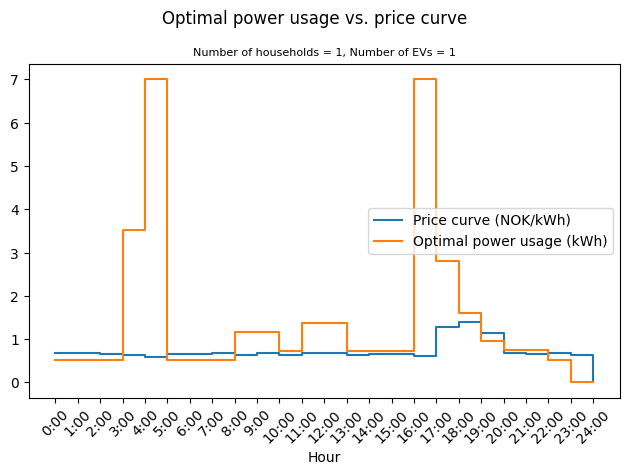

Optimal power usage for each hour:
------------------------------------------------------------
Hour | Time of day   |     NOK per kWh |     Usage (kWh)
------------------------------------------------------------
1    | (00.00-01.00) |            0.68 |            0.52
2    | (01.00-02.00) |            0.68 |            0.52
3    | (02.00-03.00) |            0.65 |            0.52
4    | (03.00-04.00) |            0.63 |            3.53
5    | (04.00-05.00) |            0.60 |            7.00
6    | (05.00-06.00) |            0.67 |            0.52
7    | (06.00-07.00) |            0.65 |            0.52
8    | (07.00-08.00) |            0.68 |            0.52
9    | (08.00-09.00) |            0.64 |            1.17
10   | (09.00-10.00) |            0.68 |            1.17
11   | (10.00-11.00) |            0.63 |            0.72
12   | (11.00-12.00) |            0.68 |            1.37
13   | (12.00-13.00) |            0.67 |            1.37
14   | (13.00-14.00) |            0.64 |     

In [649]:
# Objective function coefficients, because we have 4 shiftable appliances, [C_i,C_i,C_i,C_i]
# the coefficient vector is a 96*1 vector for all variables in x,
# x is a 96*1 decision vector for all A_i, B_i,C_i,D_i
costs = generate_price_curve_RTP(peak_hours)
c = np.tile(costs, 4)

# -------------------------------- Coefficient matrix of the equality constraints -----------------------------------------
# Initialize an empty list to store the A_eq
A_eq = []

# Create the A_eq using list comprehension
for i in range(4):
    row = [1 if i * 24 <= j < i * 24 + 24 else 0 for j in range(96)]
    A_eq.append(row)

# Right-hand side of the equality constraints
b_eq = [1.44, 1.94, 2.5, 9.9]  # Right-hand side of equality constraints

# --------------------------------- Coefficient matrix of the inequality constraints ----------------------------------------
# Create the A_ub using rows in the identity matrix for patterns
A_ub = []
identity_matrix = np.eye(24)
for i in range(24):
    row = np.tile(identity_matrix[i], 4)
    A_ub.append(row.tolist())

# Right-hand side of the inequality constraints
hour_power_cap_vector = np.full(24, 7)  # in kwh

# hourly power usage for all non-shiftable appliances
k = np.zeros(24)
for appliance in non_shiftable_appliances:
    for hour in appliance["hours"]:
        k[hour] += appliance["power"] / len(appliance["hours"])

# Right-hand side of inequality constraints: 4, 1
b_ub = hour_power_cap_vector - k 

# Bounds for each decision variable
# Non-negative bounds for A_0..A_23, B_0...B_23, C_0..C_23, D_0...D_23 all 96 variables
bounds = [
    (0, None) for _ in range(96)
]  


# # Solve the linear programming problem
# result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')  #results for Q2
result = linprog(
    c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method="highs"
)
decision_variable_dimension = len(result.x)
# print("the decision vector has the dimention of =", decision_variable_dimension)
# Check if the optimization was successful
if result.success:
    optimal_solution = result.x
    optimal_value = result.fun
    # print("Optimal Solution:", optimal_solution)
    # print("Optimal Value of Objective Function:", optimal_value)

    # Extract the optimal power usage and reshape it to get the usage for each appliance at each hour
    optimal_usage = result.x.reshape(-1, 24)
    # sum the power usage for each hour
    optimal_usage = np.sum(optimal_usage, axis=0)

    # add non-shiftable appliances to the optimal_usage
    for appliance in non_shiftable_appliances:
        for hour in appliance["hours"]:
            optimal_usage[hour] += appliance["power"] / len(appliance["hours"])


    plot_price_curve_vs_usage(costs, optimal_usage)
    print_optimal_usage(costs, optimal_usage)
else:
    print("Optimization failed. Message:", result.message)
